In [1]:
#For stock market clustering, you first make a list of stock tickers, pick and start date and a end date.
# For this cluster, I am using Adj Close, CLose, High and Low. Stocks I chose were Apple, Google,Tesla, IBM, and Mickey D;s
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')


stocks = ['AAPL','GOOGL','TSLA','IBM','MCD']

start_date = '2020-10-10'
end_date = '2023-12-31'

df_stocks = yf.download(tickers=stocks,start=start_date,end=end_date)

[*********************100%%**********************]  5 of 5 completed


In [2]:
#for the cluster, I set the variable equal to 'X' and select columns from the market. I then use MinMaxScaler to scale the features
X = df_stocks[['Close','Adj Close','High','Low']]


print(X.info())
print(X.isna().sum())


from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_scaled = ms.fit_transform(X)

print(X_scaled)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 810 entries, 2020-10-12 to 2023-12-29
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, AAPL)       810 non-null    float64
 1   (Close, GOOGL)      810 non-null    float64
 2   (Close, IBM)        810 non-null    float64
 3   (Close, MCD)        810 non-null    float64
 4   (Close, TSLA)       810 non-null    float64
 5   (Adj Close, AAPL)   810 non-null    float64
 6   (Adj Close, GOOGL)  810 non-null    float64
 7   (Adj Close, IBM)    810 non-null    float64
 8   (Adj Close, MCD)    810 non-null    float64
 9   (Adj Close, TSLA)   810 non-null    float64
 10  (High, AAPL)        810 non-null    float64
 11  (High, GOOGL)       810 non-null    float64
 12  (High, IBM)         810 non-null    float64
 13  (High, MCD)         810 non-null    float64
 14  (High, TSLA)        810 non-null    float64
 15  (Low, AAPL)         810 non-null    fl

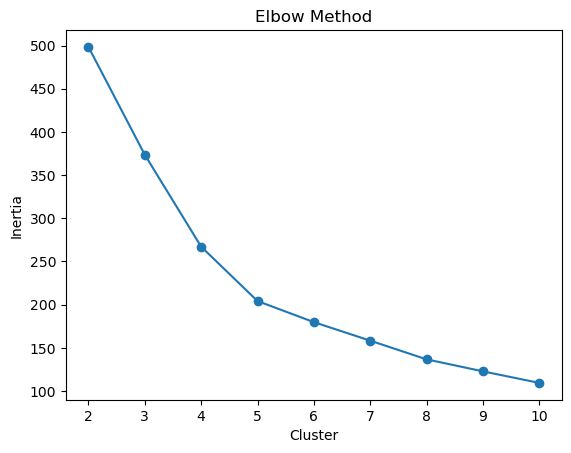

In [3]:
# for the folloing cluster analysis, I use the 'Elbow Method' to find the optimal value of k
from sklearn.cluster import KMeans


cc = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=0).fit(X_scaled)
    cc.append(kmeans.inertia_)




import matplotlib.pyplot as plt

#elbow method for optimal number of clusters

plt.plot(range(2,11),cc,marker='o')
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


#optimal numver of cluster is at 9

k = 8

kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10,random_state=0).fit(X_scaled)
labels = kmeans.labels_
X['Cluster'] = labels


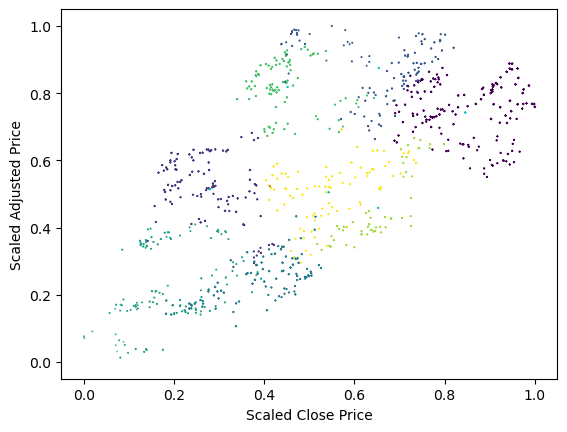

In [4]:
# The optimal cluster is at k=8, I then use that information for kmeans clustering with the optimal k value
k = 8

kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10,random_state=0).fit(X_scaled)
labels = kmeans.labels_
X['Cluster'] = labels

#visuals of clusters

plt.scatter(X_scaled[:,0],X_scaled[:,1],X_scaled[:,2],c=X['Cluster'],edgecolors='red',marker='x')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],marker='x',color='c')
plt.xlabel('Scaled Close Price')
plt.ylabel('Scaled Adjusted Price')
plt.show()


In [5]:
# The silhouette Score is used to confirm the optimal number of clusters accuracy
# At k = 7, the cluster is at a maximum. It never reaches this peak again given the historical data
pred = kmeans.predict(X_scaled)
from sklearn.metrics import silhouette_score
sh = silhouette_score(X_scaled,pred)
print(f'sh score: {sh*100:.2f}%')
print(kmeans.inertia_)

sh score: 39.81%
136.61329725242564
